# Import Libraries

In [1]:
import time
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns
from minisom import MiniSom 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

# Load data set
#### Once loaded,we could convert the txt data to a NumPy array, and we only pick the most 10 interesting attributes.

In [2]:
def loadDataset(infile):
    df = pd.read_csv(infile, sep='\t', header=None, dtype=str, na_filter=False)
    return np.array(df).astype(np.float)

a=loadDataset("ticdata2000.txt")
col1=[0,4,41,42,43,46,58,60,67,81]
a=a[:,col1]

# SOM 
#### In this part, we could train the data, using a competitive layer of 26*15.

In [3]:
som = MiniSom(26,15,a.shape[1],sigma=5,learning_rate=0.2)
som.random_weights_init(a)
som.train_random(a,2000)

# Mapping
#### Once trained, the map can classify each input vector from the input space by finding the node with the closest (smallest distance metric) weight vector to it.  It's a process of dimension reduction.

In [4]:
new_data=[]
for i,row in enumerate(a):
    print((str(i+1))+' of 5823',end='\r')
    coor=som.winner(row)
    new_data.append([coor[0],coor[1]])

# Choose Number of Clusters
#### Implemented Elbow Method to find the optimal k, that is to repeatedly run k-means clustering on the dataset for a range of values of k, and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. Here the optimal k is 6.

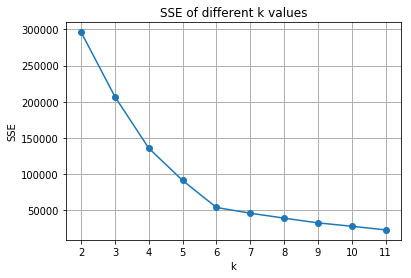

In [7]:
def elbow(data):
    SSE=[]
    k_vals=[2,3,4,5,6,7,8,9,10,11]
    for k in k_vals:
        model=KMeans(n_clusters=k,max_iter=500, n_init=10)
        model.fit(data)
        SSE.append(model.inertia_)
        
    X = range(2,12)
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.plot(X,SSE,'o-')
    plt.grid(True, linestyle = "-", linewidth = "1")
    plt.title("SSE of different k values")
    my_x_ticks = np.arange(2, 12, 1)
    plt.xticks(my_x_ticks)
    plt.show()
    
elbow(new_data)

# K-means Clustering

In [45]:
model =KMeans(n_clusters=6,max_iter=300, n_init=100)
t0 = time.time()
model = model.fit(new_data)
t_batch = time.time() - t0
y_pred1=model.predict(new_data)
print(metrics.calinski_harabaz_score(new_data, y_pred1))
print(t_batch_)

14285.497111715427
0.5694353580474854


#### The centroids table is as follows:

In [6]:
features=["som1","som2"]
clus1=model.cluster_centers_
clustroids1 = pd.DataFrame(clus1.T,index=features,columns='Cluster_0 Cluster_1 Cluster_2 Cluster_3 Cluster_4 Cluster_5 '.split())
clustroids1.round(3)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
som1,23.022,3.776,11.663,21.964,1.937,13.159
som2,11.544,0.447,12.393,0.834,12.711,1.611


# Visualization
#### Firstly, we could add a little noise to the coordinates of each node, otherwise many nodes would be overlapping.

In [7]:
def re_org_data(new_data):
    re_new_data=new_data
    re_new_data=re_new_data.astype(np.float64)
    for row in re_new_data:
        row[0]=float(row[0])+np.random.normal(loc=0.0, scale=0.5,size=1)
        row[1]=float(row[1])+np.random.normal(loc=0.0, scale=0.5,size=1)
    return re_new_data

#### This is the scatter plot of the new 2D feature space. 

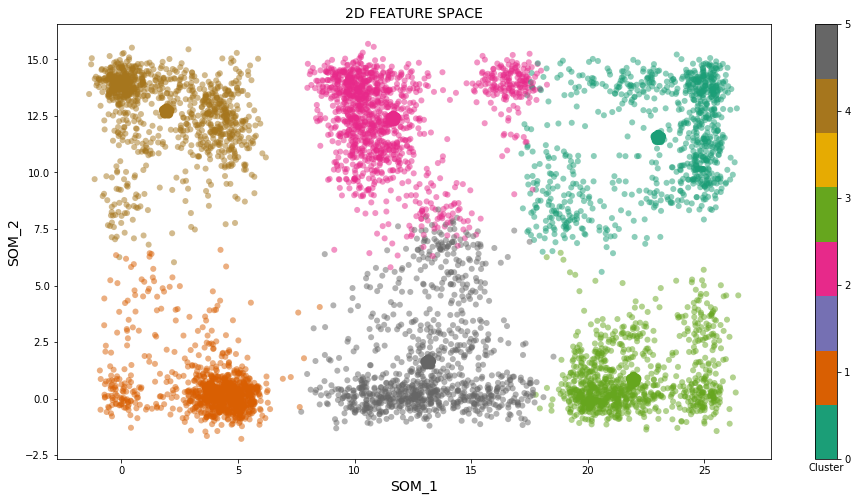

In [8]:
new_data=np.array(new_data)
re_new_data=re_org_data(new_data)
fig=plt.figure(figsize=(16,8))
ax = fig.gca()
plt.xlabel('SOM_1',fontsize=14)
plt.ylabel('SOM_2',fontsize=14)
plt.title('2D FEATURE SPACE',fontsize=14)
plt.scatter(re_new_data[:,0],re_new_data[:,1],c=y_pred1,cmap=cm.Dark2,linewidths=0.005,alpha=0.5)
fig=plt.scatter(clus1[:,0],clus1[:,1],c=np.array([0,1,2,3,4,5]),cmap=cm.Dark2,linewidths=10,marker='*')
cbar=plt.colorbar(fig)
cbar.ax.set_xlabel('Cluster')
plt.show()

#### The following figure visualizes the relation between samples in 2D map. The darker areas represent similarity while the brighter areas represent dissimilarity.

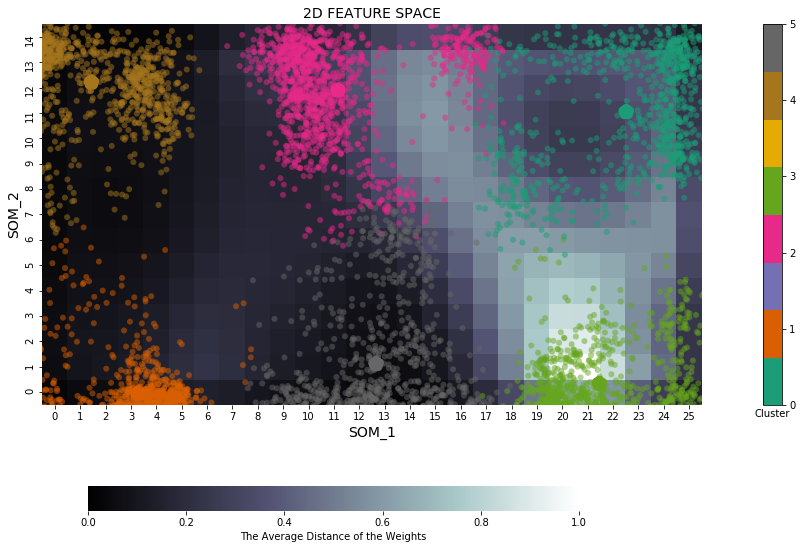

In [42]:
# draw the background
dis_map=som.distance_map()
fig=plt.figure(figsize = (22,10))
ax = plt.gca() 
sns.heatmap(pd.DataFrame(dis_map.T), annot=False, vmax=1,vmin = 0,square=True, cmap="bone",cbar_kws={"orientation": "horizontal", "shrink":0.40, "label": "The Average Distance of the Weights"})
#draw the data points
new_data=np.array(new_data)
re_new_data=re_org_data(new_data)
plt.xlabel('SOM_1',fontsize=14)
plt.ylabel('SOM_2',fontsize=14)
plt.title('2D FEATURE SPACE',fontsize=14)
fig=plt.scatter(re_new_data[:,0],re_new_data[:,1],c=y_pred1,cmap=cm.Dark2,linewidths=0.005,alpha=0.5)
fig=plt.scatter(clus1[:,0],clus1[:,1],c=np.array([0,1,2,3,4,5]),cmap=cm.Dark2,linewidths=10,marker='*')
cbar=plt.colorbar(fig)
cbar.ax.set_xlabel('Cluster')
ax.invert_yaxis()
plt.show()

In [15]:
def get_data(data,feat_num,y_pred):
    new_data=data[:,feat_num]
    new_data=np.c_[new_data,y_pred]
    for row in new_data:
        row[0]+=np.random.normal(loc=0.0, scale=0.5,size=1)
        row[1]+=np.random.normal(loc=0.0, scale=0.3,size=1)
        row[2]+=np.random.normal(loc=0.0, scale=0.5,size=1)
        row[3]+=np.random.normal(loc=0.0, scale=0.5,size=1)
        row[4]+=np.random.normal(loc=0.0, scale=0.5,size=1)
        row[5]+=np.random.normal(loc=0.0, scale=0.5,size=1)
        row[6]+=np.random.normal(loc=0.0, scale=0.5,size=1)
        row[7]+=np.random.normal(loc=0.0, scale=0.125,size=1)
        row[8]+=np.random.normal(loc=0.0, scale=3,size=1)
        row[9]+=np.random.normal(loc=0.0, scale=0.25,size=1)
    return new_data


In [20]:
def get_data2(data,feat_num,y_pred):
    new_data=data[:,feat_num]
    new_data=np.c_[new_data,y_pred]
    return new_data


In [25]:
df2.groupby(['Cluster','86-CARAVAN']).mean()

47-PRERSAUT  59-PBRAND  68-APERSAUT  5-MOSHOOFD  \
Cluster 86-CARAVAN                                                    
0.0     0.0            5.825036   2.432432     1.112376    1.995733   
        1.0            5.984733   3.274809     1.137405    1.938931   
1.0     0.0            0.026681   3.098186     0.005336    7.372465   
        1.0            0.263158   3.315789     0.052632    8.263158   
2.0     0.0            5.748252   0.219406     1.073427    6.696678   
        1.0            5.962264   0.094340     1.094340    7.056604   
3.0     0.0            0.072062   1.784922     0.013304    2.212860   
        1.0            0.000000   1.705882     0.000000    2.323529   
4.0     0.0            0.000000   0.203996     0.000000    7.669821   
        1.0            0.000000   0.000000     0.000000    8.150000   
5.0     0.0            5.843489   3.694146     1.111111    7.904421   
        1.0            5.901099   3.582418     1.186813    7.791209   

                    43-MKOOPKLA  61-PPLEZIER  42-MINKGEM  82-APLEZIER  \
Cluster 86-CARAVAN                                                      
0.0     0.0            6.557610     0.025605    4.641536     0.007112   
        1.0            6.709924     0.030534    4.893130     0.015267   
1.0     0.0            3.216649     0.000000    3.566702     0.000000   
        1.0            3.684211     0.315789    3.789474     0.052632   
2.0     0.0            3.430070     0.008741    3.406469     0.002622   
        1.0            3.811321     0.283019    3.811321     0.113208   
3.0     0.0            6.303769     0.024390    4.455654     0.007761   
        1.0            6.382353     0.088235    4.588235     0.029412   
4.0     0.0            3.137750     0.005258    3.280757     0.001052   
        1.0            3.150000     0.000000    3.650000     0.000000   
5.0     0.0            3.232975     0.016726    3.477897     0.005974   
        1.0            3.395604     0.142857    3.703297     0.043956   

                    1-MOSTYPE  44-PWAPART  
Cluster 86-CARAVAN                         
0.0     0.0          6.910384    1.071124  
        1.0          6.786260    1.442748  
1.0     0.0         31.871932    1.118463  
        1.0         35.736842    1.157895  
2.0     0.0         28.576049    0.308566  
        1.0         30.226415    0.301887  
3.0     0.0          7.700665    0.597561  
        1.0          8.558824    0.676471  
4.0     0.0         32.958991    0.173502  
        1.0         35.200000    0.200000  
5.0     0.0         33.799283    1.476703  
        1.0         33.461538    1.560440

In [21]:
data_ana=loadDataset("ticdata2000.txt")
data_get2=get_data2(data_ana,[46,58,67,4,42,60,41,81,0,43,85],y_pred1)
df2=pd.DataFrame(data_get2,columns=["47-PRERSAUT","59-PBRAND","68-APERSAUT","5-MOSHOOFD","43-MKOOPKLA","61-PPLEZIER",
                                 "42-MINKGEM","82-APLEZIER","1-MOSTYPE","44-PWAPART","86-CARAVAN","Cluster"])

In [22]:
df2.groupby('Cluster').mean()

,47-PRERSAUT,59-PBRAND,68-APERSAUT,5-MOSHOOFD,43-MKOOPKLA,61-PPLEZIER,42-MINKGEM,82-APLEZIER,1-MOSTYPE,44-PWAPART,86-CARAVAN
Cluster,,,,,,,,,,,
0.0,5.850120,2.564748,1.116307,1.986811,6.581535,0.026379,4.681055,0.008393,6.890887,1.129496,0.157074
1.0,0.031381,3.102510,0.006276,7.390167,3.225941,0.006276,3.571130,0.001046,31.948745,1.119247,0.019874
2.0,5.757728,0.213868,1.074353,6.712615,3.446951,0.020886,3.424394,0.007519,28.649123,0.308271,0.044277
3.0,0.069444,1.782051,0.012821,2.216880,6.306624,0.026709,4.460470,0.008547,7.731838,0.600427,0.036325
4.0,0.000000,0.199794,0.000000,7.679712,3.138002,0.005149,3.288363,0.001030,33.005149,0.174047,0.020597
5.0,5.849138,3.683190,1.118534,7.893319,3.248922,0.029095,3.500000,0.009698,33.766164,1.484914,0.098060
